In [1]:
import pandas as pd
import numpy as np

train_path = "./data/train.csv"
test_path = "./data/val.csv"

In [2]:
# read data
train_raw_data = pd.read_csv(train_path, sep=";")
test_raw_data = pd.read_csv(test_path, sep=";")
attrCon = ["ID", "Reason for absence", "Transportation expense", "Distance from Residence to Work", "Service time", "Age", "Work load Average/day ", "Hit target", "Son", "Pet", "Weight", "Height", "Body mass index", "Absenteeism time in hours"]
attrCat = ["Month of absence", "Day of the week", "Seasons", "Education"]
attrBool = ["Disciplinary failure", "Social drinker", "Social smoker"]
IQR_limit = 2.0
corr_line = 0.10
skew_line = 1.0

In [3]:
train_raw_data.info()
print("="*50)
test_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
ID                                 540 non-null int64
Reason for absence                 540 non-null int64
Month of absence                   540 non-null int64
Day of the week                    540 non-null int64
Seasons                            540 non-null int64
Transportation expense             540 non-null int64
Distance from Residence to Work    540 non-null int64
Service time                       540 non-null int64
Age                                540 non-null int64
Work load Average/day              540 non-null float64
Hit target                         540 non-null int64
Disciplinary failure               540 non-null int64
Education                          540 non-null int64
Son                                540 non-null int64
Social drinker                     540 non-null int64
Social smoker                      540 non-null int64
Pet                          

In [4]:
train_raw_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,18.035185,19.179630,6.866667,3.888889,2.537037,225.640741,29.800000,12.646296,36.557407,276.848431,...,0.061111,1.209259,1.079630,0.603704,0.070370,0.646296,79.505556,172.001852,26.846296,6.759259
std,11.055630,8.553832,3.343201,1.432030,1.193877,68.048743,14.922832,4.190156,6.256903,41.863675,...,0.239756,0.570378,1.171378,0.489581,0.256007,1.068561,12.598185,6.073911,4.144926,11.968628
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,3.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,4.000000,3.000000,1.000000,179.000000,16.000000,10.000000,32.750000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,3.000000,226.500000,26.000000,13.000000,37.000000,265.017000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,262.000000,50.000000,16.000000,40.000000,302.585000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
# 相关性
# 皮尔逊相关系数
corr_matrix = train_raw_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40))
hm=sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':25}, cmap="YlGnBu")
plt.show()

<Figure size 4000x4000 with 2 Axes>

In [6]:
train_raw_data = train_raw_data.drop(columns=["Weight"])
test_raw_data = test_raw_data.drop(columns=["Weight"])

<Figure size 432x288 with 0 Axes>

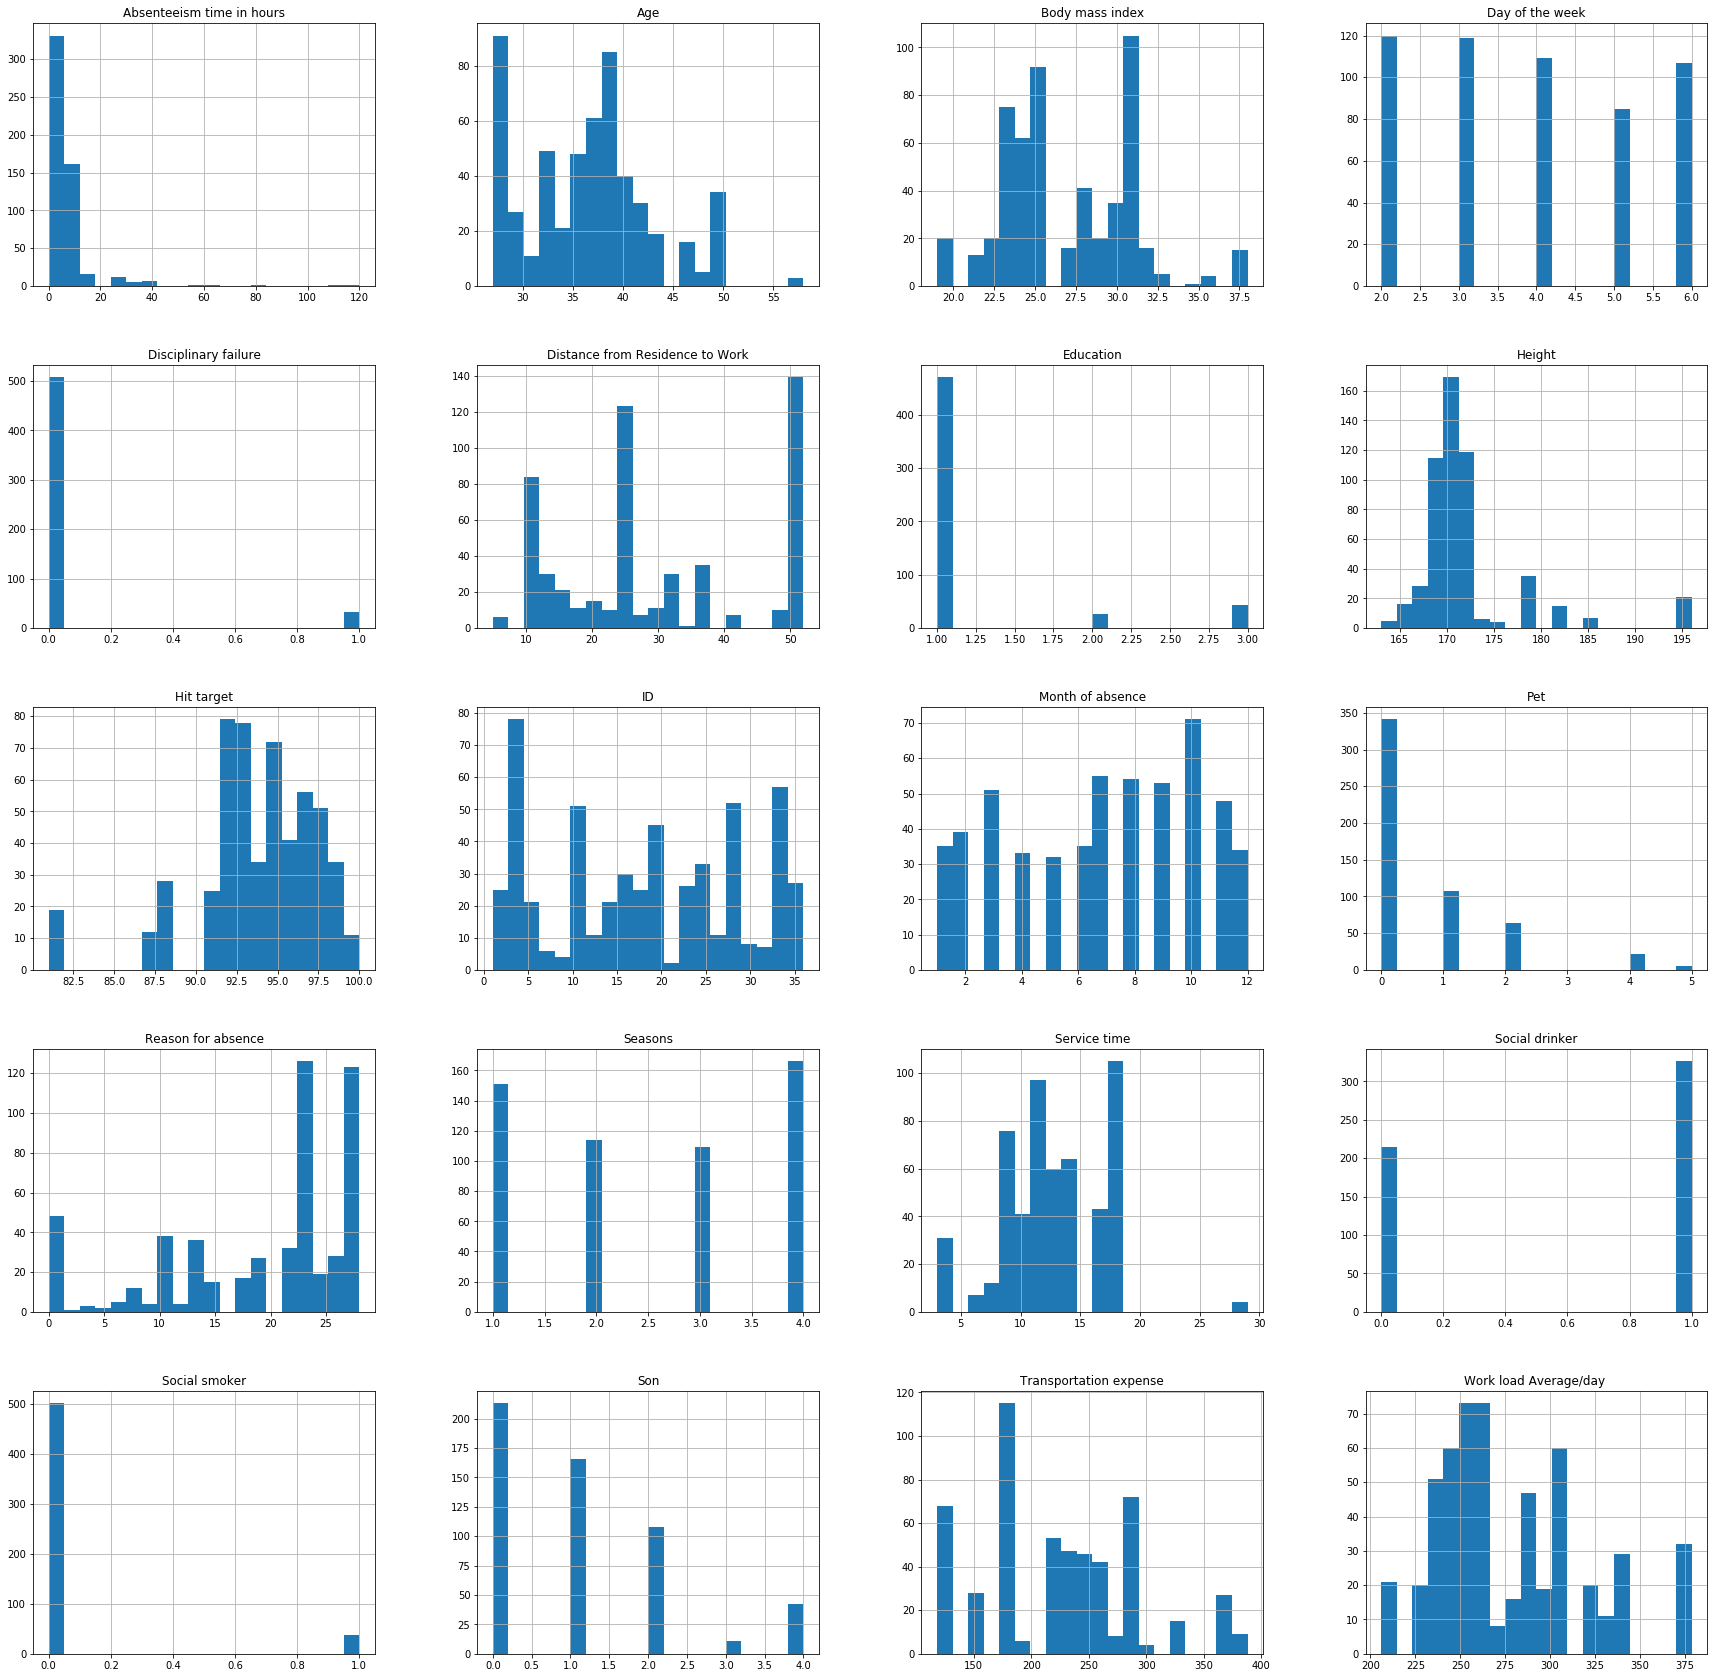

In [7]:
plt.figure(1)
train_raw_data.hist(bins=20, figsize=(30, 30))
plt.show()

In [8]:
featureCon = ["Absenteeism time in hours", "Transportation expense", "Distance from Residence to Work", "Service time", "Age", "Work load Average/day ", "Hit target", "Son", "Pet", "Height", "Body mass index"]
# deal with skew
for s in featureCon:
    if(abs(train_raw_data[s].skew()) > skew_line):
        train_raw_data[s] = train_raw_data[s].apply(lambda x : np.log(x + 1))
        test_raw_data[s] = test_raw_data[s].apply(lambda x : np.log(x + 1))

In [9]:
# delete abnormal data
# featureAbn = list(set(featureCon) - set(["Absenteeism time in hours"]))
featureAbn = featureCon
index = set(train_raw_data.index)

for s in featureAbn:
    percentile = np.percentile(train_raw_data[s], [0, 25, 50, 75, 100])
    IQR = percentile[3] - percentile[1]
    upLimit = percentile[3]+IQR*IQR_limit
    downLimit = percentile[1]-IQR*IQR_limit
    for idx in index:
        if(train_raw_data.loc[idx][s] > upLimit or train_raw_data.loc[idx][s] < downLimit):
            train_raw_data.drop([idx], inplace=True)
            index = index - set([idx])

In [10]:
train_raw_data.shape

(464, 20)

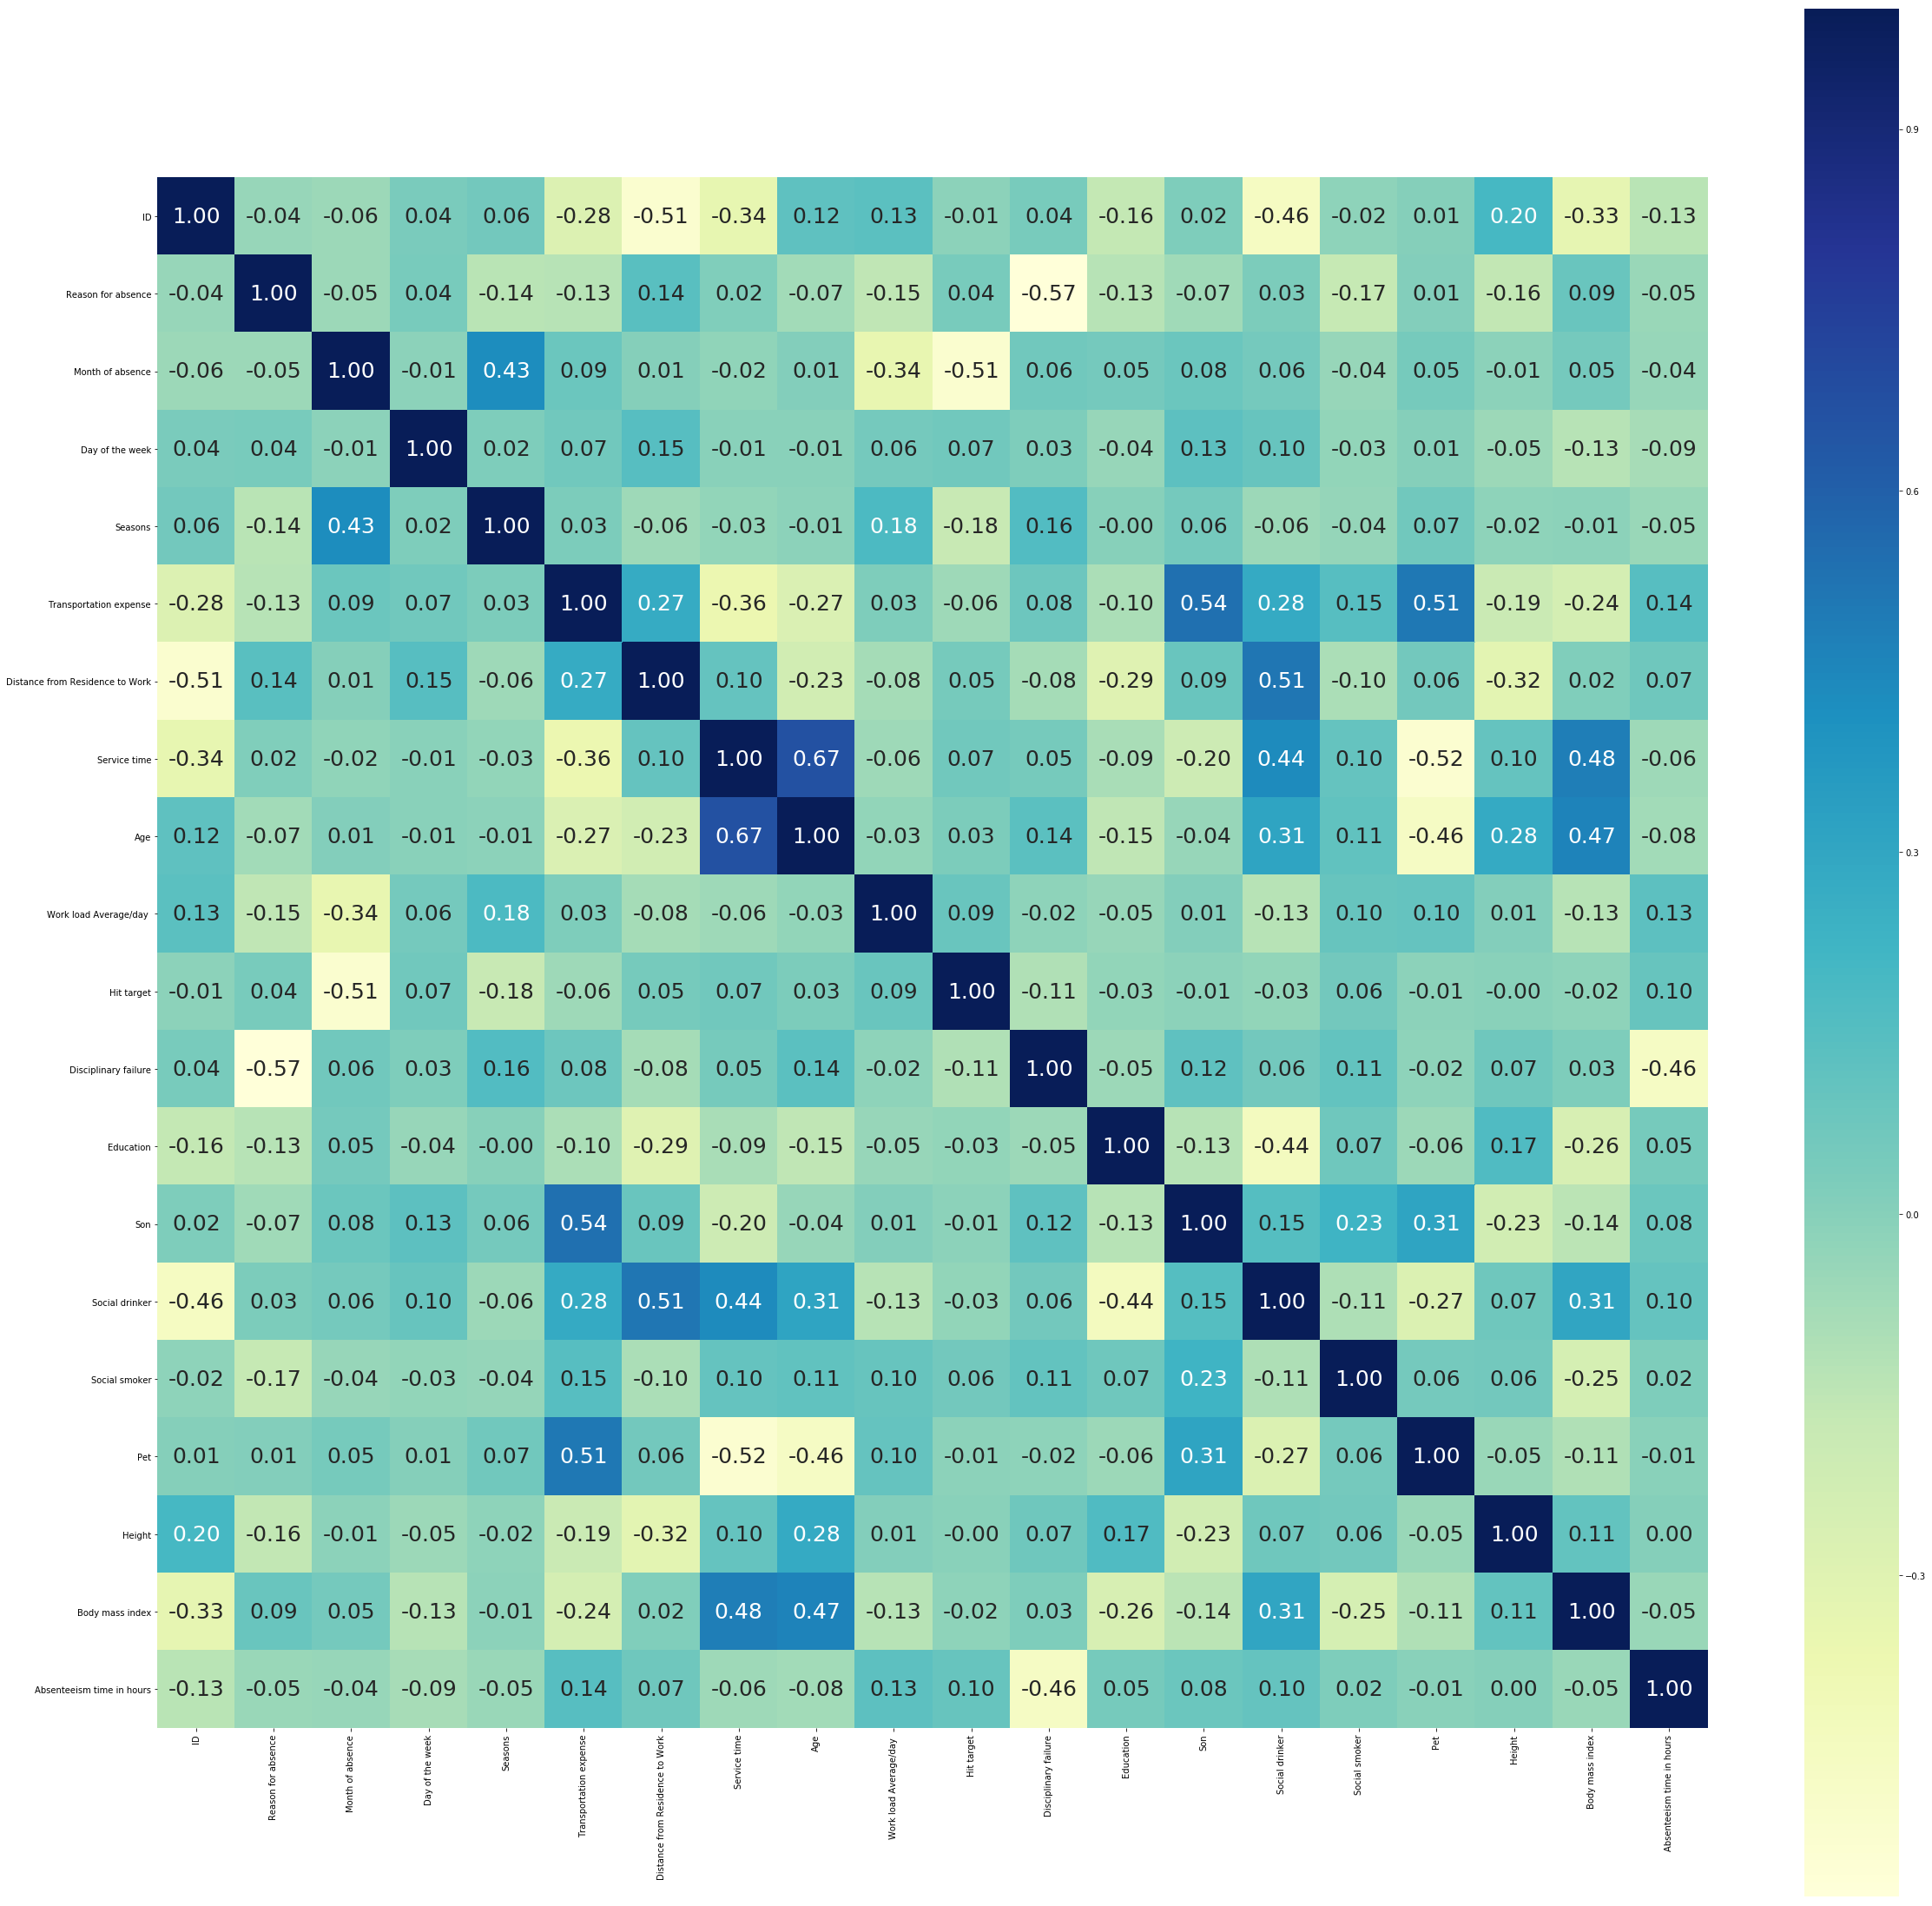

In [11]:
# 相关性
# 皮尔逊相关系数
corr_matrix = train_raw_data.corr()

plt.figure(figsize=(40,40))
hm=sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':25}, cmap="YlGnBu")
plt.show()

In [12]:
train_raw_data.drop(columns=["Service time"], inplace=True)
test_raw_data.drop(columns=["Service time"], inplace=True)

In [13]:
# decide attr to use
attrs = set(corr_matrix.columns) - set(["Reason for absence", "Service time"])
using_attrs = []
for attr in attrs:
    if(abs(corr_matrix["Reason for absence"][attr]) > corr_line):
        using_attrs.append(attr)

In [14]:
# data solve
from sklearn import preprocessing

n_train = len(train_raw_data)
n_test = len(test_raw_data)

raw_data = pd.concat([train_raw_data, test_raw_data])

using_con = []
using_cat = []
using_bool = []
for attr in using_attrs:
    if(attr in attrCon):
        using_con.append(attr)
    elif(attr in attrCat):
        using_cat.append(attr)
    else:
        using_bool.append(attr)

X_vec_con = raw_data[using_con].values
X_vec_cat = raw_data[using_cat].values
X_vec_bool = raw_data[using_bool].values

if(X_vec_con.shape[1] > 0):
    scaler=preprocessing.StandardScaler().fit(X_vec_con)
    X_vec_con_ed=scaler.transform(X_vec_con)
else:
    X_vec_con_ed = X_vec_con
    
if(X_vec_cat.shape[1] > 0):
    enc=preprocessing.OneHotEncoder(categories='auto')
    enc.fit(X_vec_cat)
    X_vec_cat_ed=enc.transform(X_vec_cat).toarray()
else:
    X_vec_cat_ed = X_vec_cat
    
X_vec = np.concatenate((X_vec_con_ed, X_vec_cat_ed, X_vec_bool), axis=1)
Y_vec = raw_data["Reason for absence"].values[:, np.newaxis]

/home/ddrh/Software/python_venv/general/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ddrh/Software/python_venv/general/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [15]:
# split train and test
x_train = X_vec[0 : n_train]
y_train = Y_vec[0 : n_train]
x_test = X_vec[n_train : n_test+n_train]
y_test = Y_vec[n_train : n_test+n_train]

In [16]:
# using svc
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

clf = SVC(kernel="linear")
clf.fit(x_train, y_train)
y_pre = clf.predict(x_test)
recall = recall_score(y_test, y_pre, average='micro')
acc = precision_score(y_test, y_pre, average='micro') 
f1 = f1_score(y_test, y_pre, average='micro')
print("Accuracy = ", acc)
print('Recall = ', recall)
print('F1 = ', f1)

Accuracy =  0.41
Recall =  0.41
F1 =  0.41


/home/ddrh/Software/python_venv/general/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ddrh/Software/python_venv/general/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
using_attrs

['Social smoker',
 'Distance from Residence to Work',
 'Disciplinary failure',
 'Transportation expense',
 'Education',
 'Height',
 'Work load Average/day ',
 'Seasons']